### Goals: Select features, OHE on categorical variables, MinMax Scaler, Standard Scaler

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Import the cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")
df.head()

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3


In [5]:
df["merchandise"].nunique()

10

In [6]:
df["country"].nunique()

198

In [7]:
df["ip"].nunique()

1028810

In [8]:
df["url"].nunique()

663265

In [9]:
df["bidder_id"].nunique()

1983

In [10]:
df["payment_account"].nunique()

1983

In [11]:
df["address"].nunique()

1983

In [12]:
df["bid_id"].nunique()

3068523

In [13]:
df["auction"].nunique()

12740

In [14]:
df["device"].nunique()

5726

In [15]:
# payment_account and address values are all unique for each bidder_id ..... not helpful for this analysis 
# will drop those columns 
# https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas
df = df[df.columns.difference(["payment_account", "address"])]
df.head()

,auction,bid_id,bidder_id,country,device,ip,merchandise,outcome,time,url
0,yitr4,85371.0,91a3c57b13234af24875c56fb7e2b2f4rb56a,ke,phone35,82.34.177.248,home goods,0.0,9.759489e+15,vasstdc27m7nks3
1,btpyy,274487.0,91a3c57b13234af24875c56fb7e2b2f4rb56a,zm,phone1004,202.130.71.167,home goods,0.0,9.760249e+15,vasstdc27m7nks3
2,kj2ko,527436.0,91a3c57b13234af24875c56fb7e2b2f4rb56a,ke,phone4,22.54.76.225,home goods,0.0,9.762261e+15,vasstdc27m7nks3
3,1m5t8,554135.0,91a3c57b13234af24875c56fb7e2b2f4rb56a,ke,phone4,32.13.237.126,home goods,0.0,9.762431e+15,vasstdc27m7nks3
4,btpyy,607628.0,91a3c57b13234af24875c56fb7e2b2f4rb56a,ke,phone4,202.236.188.240,home goods,0.0,9.762789e+15,vasstdc27m7nks3


In [19]:
# Look at url value counts for binning
auction_counts = df["auction"].value_counts()
auction_counts

jqx39    216675
jefix     41162
opnq4     35183
r9bkk     35009
uvnl7     26561
          ...  
u60if         1
2ndn1         1
jxh0l         1
ioz85         1
76l7h         1
Name: auction, Length: 12740, dtype: int64

<AxesSubplot:ylabel='Density'>

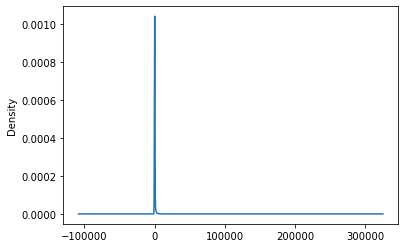

In [20]:
# Visualize the value counts of url
auction_counts.plot.density()

<AxesSubplot:ylabel='Density'>

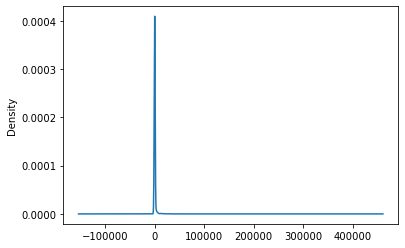

In [22]:
# Look at url value counts for binning
device_counts = df["device"].value_counts()
# Visualize the value counts of url
device_counts.plot.density()

<AxesSubplot:ylabel='Density'>

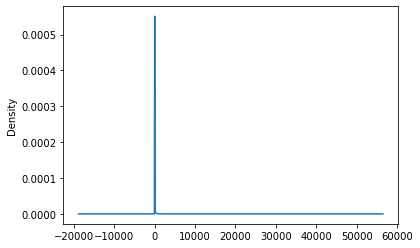

In [23]:
# Look at url value counts for binning
ip_counts = df["ip"].value_counts()
# Visualize the value counts of url
ip_counts.plot.density()

In [30]:
df.dtypes

auction         object
bid_id         float64
bidder_id       object
country         object
device          object
ip              object
merchandise     object
outcome        float64
time           float64
url             object
dtype: object